# Pyam Integration

*Note:* These notebooks will be re-written as part of our [first milestone](https://github.com/openclimatedata/openscm/milestone/1)

Here we make use of the ``scenarios`` module of OpenSCM. However, keep in mind the [direct connection to the IIASA database made available in Pyam](https://pyam-iamc.readthedocs.io/en/latest/tutorials/iiasa_dbs.html) for more in-depth analysis with up-to-date scenarios.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
import pyam
import seaborn as sns

from pyam import IamDataFrame
from openscm.scmdataframe import ScmDataFrame
from openscm.scenarios import rcps

<IPython.core.display.Javascript object>

In [2]:
sns.set(style="darkgrid")

## Scenarios

Here we use the RCPs. Just for illustration, we firstly convert them back to `pyam.IamDataFrame`, then show how OpenSCM works with IamDataFrames from this point onwards.

*Note:* we have to filter the data first as IamDataFrames do not work with data outside of Panda's datetime bounds (see [here](https://stackoverflow.com/a/37226672)). 

In [3]:
df = IamDataFrame(rcps.filter(year=range(1, 2201)).timeseries())
type(df)

pyam.core.IamDataFrame

### Pyam features

The following cells provide a brief overview of the metadata and plots that can be examined with a `pyam.IamDataFrame`.

In [4]:
# NBVAL_IGNORE_OUTPUT
df["variable"].unique()

array(['Emissions|BC', 'Emissions|C2F6', 'Emissions|C6F14',
       'Emissions|CCl4', 'Emissions|CF4', 'Emissions|CFC11',
       'Emissions|CFC113', 'Emissions|CFC114', 'Emissions|CFC115',
       'Emissions|CFC12', 'Emissions|CH3Br', 'Emissions|CH3CCl3',
       'Emissions|CH3Cl', 'Emissions|CH4', 'Emissions|CO',
       'Emissions|CO2|MAGICC AFOLU',
       'Emissions|CO2|MAGICC Fossil and Industrial', 'Emissions|HCFC141b',
       'Emissions|HCFC142b', 'Emissions|HCFC22', 'Emissions|HFC125',
       'Emissions|HFC134a', 'Emissions|HFC143a', 'Emissions|HFC227ea',
       'Emissions|HFC23', 'Emissions|HFC245fa', 'Emissions|HFC32',
       'Emissions|HFC4310', 'Emissions|Halon1202', 'Emissions|Halon1211',
       'Emissions|Halon1301', 'Emissions|Halon2402', 'Emissions|N2O',
       'Emissions|NH3', 'Emissions|NMVOC', 'Emissions|NOx',
       'Emissions|OC', 'Emissions|SF6', 'Emissions|SOx'], dtype=object)

In [5]:
df["region"].unique()

array(['World'], dtype=object)

In [6]:
df["scenario"].unique()

array(['RCP60', 'RCP26', 'RCP85', 'RCP45'], dtype=object)

*Note:* For an explanation of the `parameter_type` column, see the 'timeseries-conversion' notebook.

In [7]:
# NBVAL_IGNORE_OUTPUT
df.timeseries().head()

1765-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.000000   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010763   

                                                                    1766-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.106998   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010752   

                                                                    1767-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.133383   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010748   

                                                                    1768-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.159847   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010744   

                                                                    1769-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.186393   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010740   

                                                                    1770-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.213024   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010736   

                                                                    1771-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.239742   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010731   

                                           

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

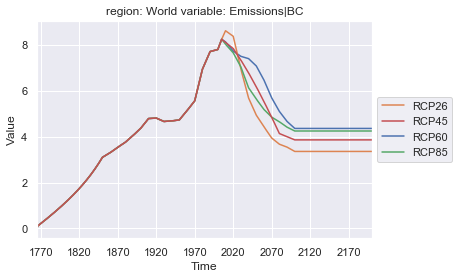

In [8]:
df.filter(variable='Emissions|BC').line_plot(
    x="time",
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a `pd.DataFrame` underneath the hood makes integration with other tools, like seaborn, trivial.

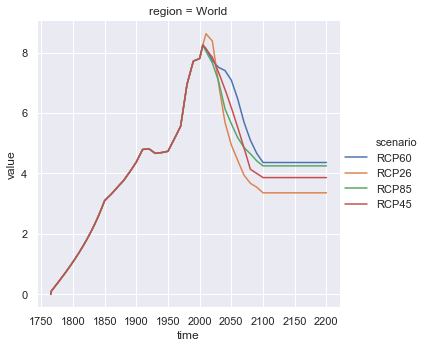

In [9]:
emissions_bc = df.filter(
    variable="Emissions|BC"
).data
sns.relplot(
    x="time",
    y="value",
    kind="line",
    col="region",
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);

## Running scenarios

OpenSCM can directly run scenarios from a `pyam.IamDataFrame` as shown.

In [24]:
import datetime as dt 

import numpy as np
from openscm.adapters import load_adapter
from openscm.core import ParameterSet
from openscm.scmdataframe import convert_openscm_to_scmdataframe, df_append

In [25]:
run_df = df.filter(variable="Emissions|CO2*", scenario="RCP60")
run_df.head()

,model,scenario,region,variable,unit,time,parameter_type,value
6540,AIM,RCP60,World,Emissions|CO2|MAGICC AFOLU,Gt C / yr,1765-01-01,average,0.000000
6541,AIM,RCP60,World,Emissions|CO2|MAGICC AFOLU,Gt C / yr,1766-01-01,average,0.005338
6542,AIM,RCP60,World,Emissions|CO2|MAGICC AFOLU,Gt C / yr,1767-01-01,average,0.010677
6543,AIM,RCP60,World,Emissions|CO2|MAGICC AFOLU,Gt C / yr,1768-01-01,average,0.016015
6544,AIM,RCP60,World,Emissions|CO2|MAGICC AFOLU,Gt C / yr,1769-01-01,average,0.021353


In [26]:
results = []
for a in ["DICE"]:#, "PH99"]:
    ps = ScmDataFrame(run_df).to_parameterset()
    ps.generic("Start Time").value = np.datetime64(run_df.data["time"].min())
    ps.generic("Stop Time").value = np.datetime64(run_df.data["time"].max())
    outputs = ParameterSet()
    adapter = load_adapter(a)(ps, outputs)
    adapter.reset()
    adapter.run()
    output_scmdf = convert_openscm_to_scmdataframe(
        outputs, 
        time_points=[np.datetime64("{}-01-01".format(y)) for y in range(1765, 2101)]
    )
    results.append(output_scmdf)
    
output_scmdf = df_append(results)

In [27]:
output_scmdf.timeseries()

time                                                                                                   1765-01-01  \
model       scenario    region variable                     unit       climate_model parameter_type                 
unspecified unspecified World  Ocean Temperature Increase   delta_degC unspecified   point               0.006800   
                               Pool|CO2|Atmosphere          GtC        unspecified   point             830.400000   
                               Pool|CO2|Ocean|lower         GtC        unspecified   point           10010.000000   
                               Pool|CO2|Ocean|shallow       GtC        unspecified   point            1527.000000   
                               Radiative Forcing|CO2        W/m^2      unspecified   average             2.142363   
                               Surface Temperature Increase delta_degC unspecified   point               0.800000   

time                                                                                                   1766-01-01  \
model       scenario    region variable                     unit       climate_model parameter_type                 
unspecified unspecified World  Ocean Temperature Increase   delta_degC unspecified   point               0.010663   
                               Pool|CO2|Atmosphere          GtC        unspecified   point             827.410950   
                               Pool|CO2|Ocean|lower         GtC        unspecified   point           10010.124712   
                               Pool|CO2|Ocean|shallow       GtC        unspecified   point            1529.867339   
                               Radiative Forcing|CO2        W/m^2      unspecified   average             2.123934   
                               Surface Temperature Increase delta_degC unspecified   point               0.822264   

time                                                                                                   1767-01-01  \
model       scenario    region variable                     unit       climate_model parameter_type                 
unspecified unspecified World  Ocean Temperature Increase   delta_degC unspecified   point               0.014615   
                               Pool|CO2|Atmosphere          GtC        unspecified   point             824.503946   
                               Pool|CO2|Ocean|lower         GtC        unspecified   point           10010.251447   
                               Pool|CO2|Ocean|shallow       GtC        unspecified   point            1532.655948   
                               Radiative Forcing|CO2        W/m^2      unspecified   average             2.105980   
                               Surface Temperature Increase delta_degC unspecified   point               0.843444   

time                                                                                                   1768-01-01  \
model       scenario    region variable                     unit       climate_model parameter_type                 
unspecified unspecified World  Ocean Temperature Increase   delta_degC unspecified   point               0.018652   
                               Pool|CO2|Atmosphere          GtC        unspecified   point             821.676882   
                               Pool|CO2|Ocean|lower         GtC        unspecified   point           10010.380150   
                               Pool|CO2|Ocean|shallow       GtC        unspecified   point            1535.367988   
                               Radiative Forcing|CO2        W/m^2      unspecified   average             2.088467   
                               Surface Temperature Increase delta_degC unspecified   point               0.863585   

time                                                                                                   1769-01-01  \
model       scenario    region variable                     unit       climate_model parameter_type                 
unspecified unspec

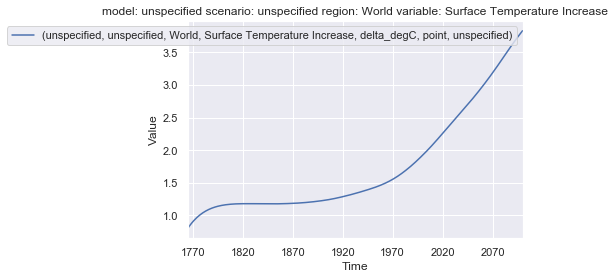

In [28]:
output_scmdf.filter(variable="Surface Temperature Increase").line_plot()